<a href="https://colab.research.google.com/github/omkarsutar9702/solar-radiation-prediction/blob/main/solar_radiation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime
from pytz import timezone
import pytz
import pandas as pd

In [2]:
from google.colab import files
uploaed = files.upload()

Saving SolarPrediction.csv to SolarPrediction.csv


In [3]:
df = pd.read_csv("SolarPrediction.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [5]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


In [6]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [7]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [8]:
india = timezone('Asia/Kolkata')
df.index = pd.to_datetime(df["UNIXTime"] , unit="s") 
df.index  = df.index.tz_localize(pytz.utc).tz_convert(india)
df["monthofyear"] = df.index.strftime("%m").astype(int)
df["dayofyear"] = df.index.strftime("%j").astype(int)
df["weekofyear"]  = df.index.strftime("%U").astype(int)
df["hour"] = df.index.hour
df["month"] = df.index.month
df['date'] = df.index.date

df['TimeSunRise'] = pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.time
df["TimeSunSet"] =pd.to_datetime(df["TimeSunSet"], format='%H:%M:%S').dt.time
df['Total_time'] = pd.to_datetime(df['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(df['TimeSunRise'], format='%H:%M:%S').dt.hour

In [9]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,monthofyear,dayofyear,weekofyear,hour,month,date,Total_time
UNIXTime,,,,,,,,,,,,,,,,,,
2016-09-30 15:25:26+05:30,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00,9,274,39,15,9,2016-09-30,12
2016-09-30 15:20:23+05:30,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00,9,274,39,15,9,2016-09-30,12
2016-09-30 15:15:26+05:30,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00,9,274,39,15,9,2016-09-30,12
2016-09-30 15:10:21+05:30,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00,9,274,39,15,9,2016-09-30,12
2016-09-30 15:05:24+05:30,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00,9,274,39,15,9,2016-09-30,12


In [10]:
def plot(t):
  f , ax = plt.subplots(figsize = (20,5))
  sns.lineplot(data=df , x = "date" , y = t)
  mean = df[t].mean()
  ax.axhline(mean , color = "green" , linestyle="--" , label = f"mean - {mean:.2f}")

  ax.set_axisbelow(True)
  ax.minorticks_on()
  ax.grid(which= "major" , linestyle="--" , linewidth =0.5 ,color= "black")
  ax.grid(which = "minor" , linestyle = ":" , linewidth = 0.5 , color = "black" , alpha = 0.7)
  ax.set_xlim([datetime(2016,9,1) , datetime(2017,1,1)])
  ax.legend();

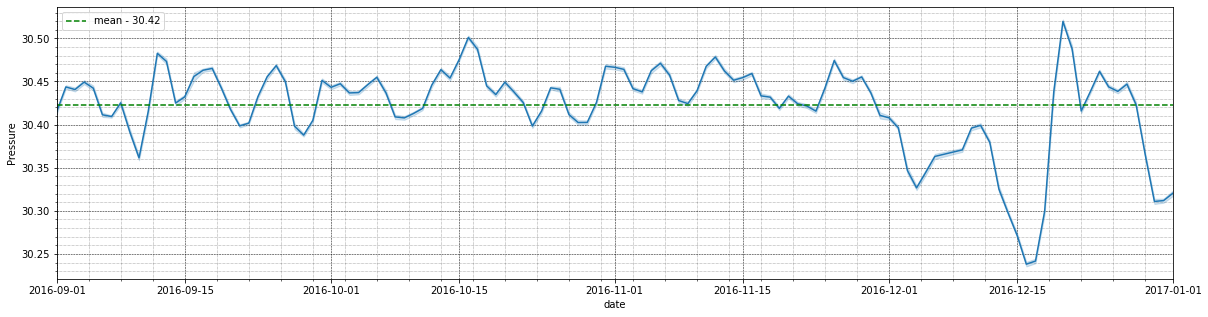

In [11]:
plot("Pressure")

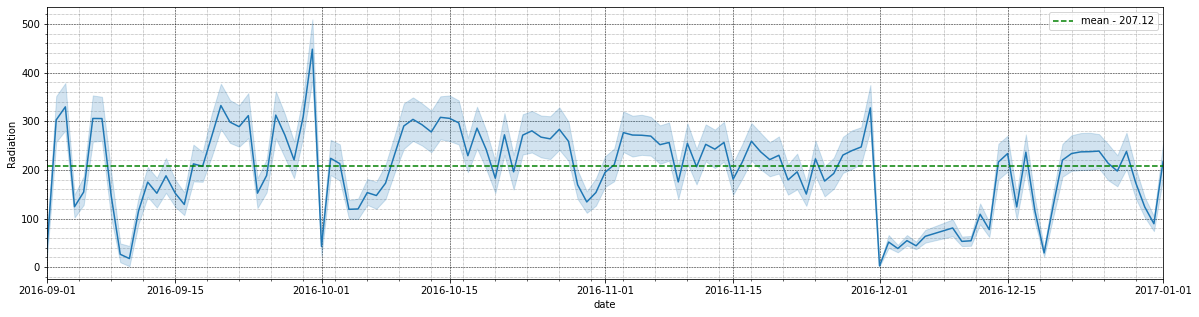

In [12]:
plot("Radiation")

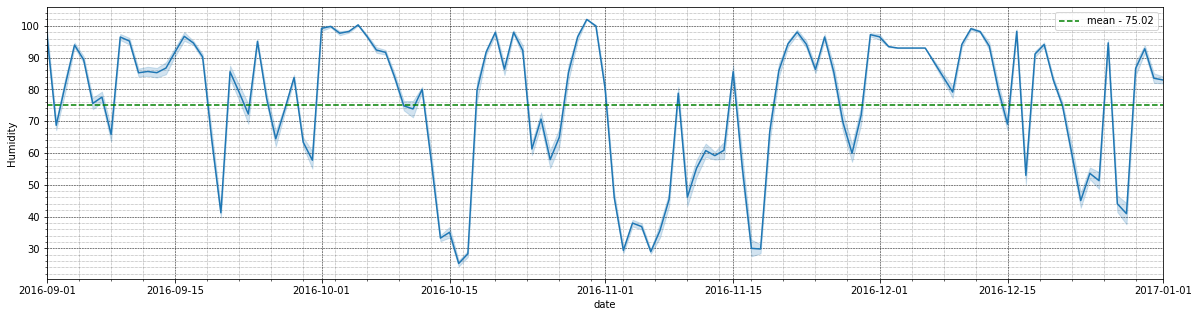

In [13]:
plot("Humidity")

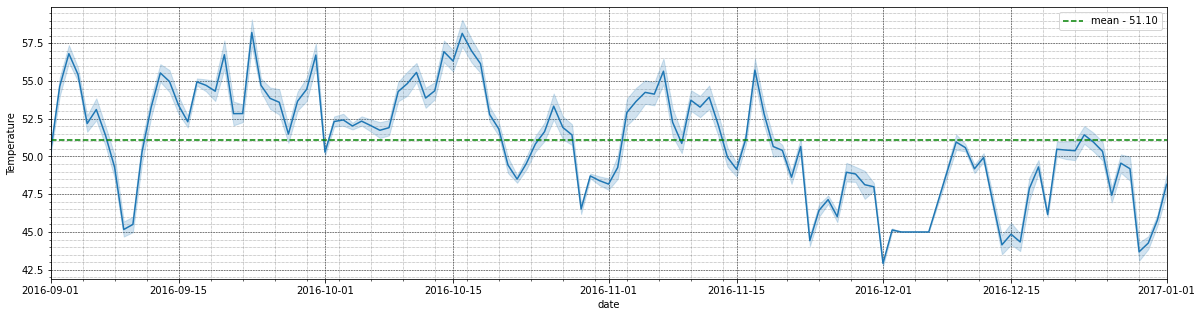

In [14]:
plot("Temperature")

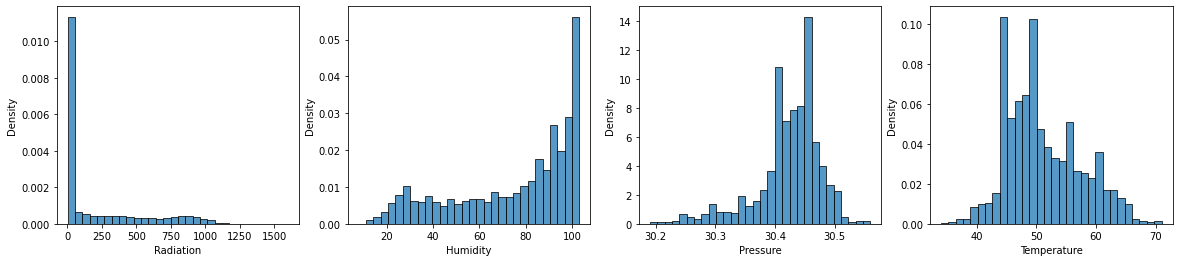

In [15]:
f , ax  = plt.subplots(1,4 , figsize=(20 , 4))
sns.histplot(df["Radiation"] , stat = "density" ,bins=30 , ax=ax[0])
sns.histplot(df["Humidity"] , stat = "density" , bins=30 , ax=ax[1])
sns.histplot(df["Pressure"] , stat = "density" ,bins=30 ,ax=ax[2])
sns.histplot(df["Temperature"] , stat = "density"  ,bins = 30 , ax=ax[3])

Text(0.5, 1.0, 'mean radiation by hour')

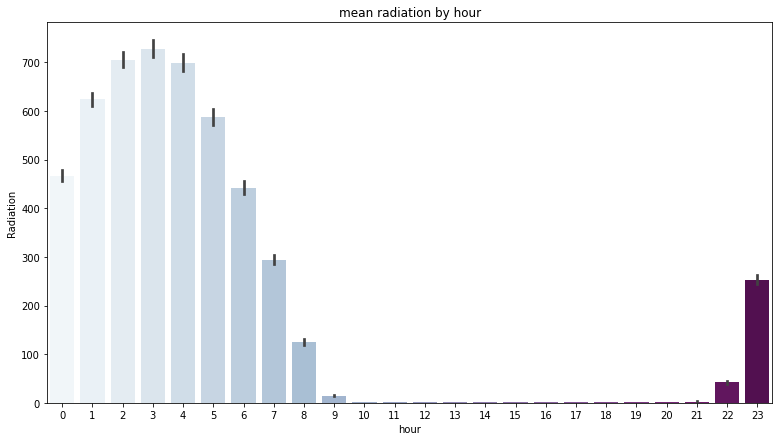

In [16]:
fig  , ax   = plt.subplots(figsize=(13 , 7))
sns.barplot(x = "hour" , y="Radiation" , data=df  ,palette="BuPu")
ax.set_title("mean radiation by hour")

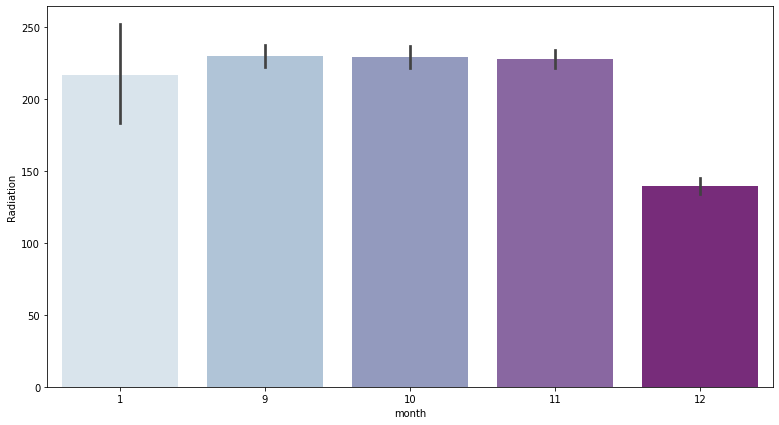

In [17]:
fig  , ax   = plt.subplots(figsize=(13 , 7))
sns.barplot(x = "month" , y="Radiation" , data=df , palette="BuPu")


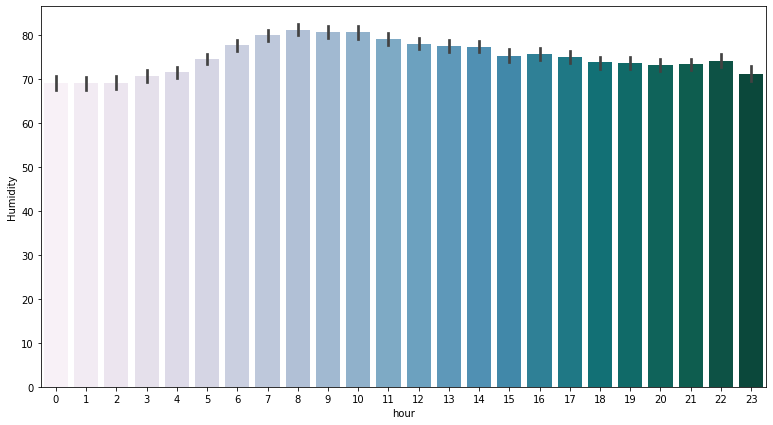

In [18]:
fig  , ax   = plt.subplots(figsize=(13 , 7))
sns.barplot(x="hour" , y="Humidity" , data=df , palette=("PuBuGn"))

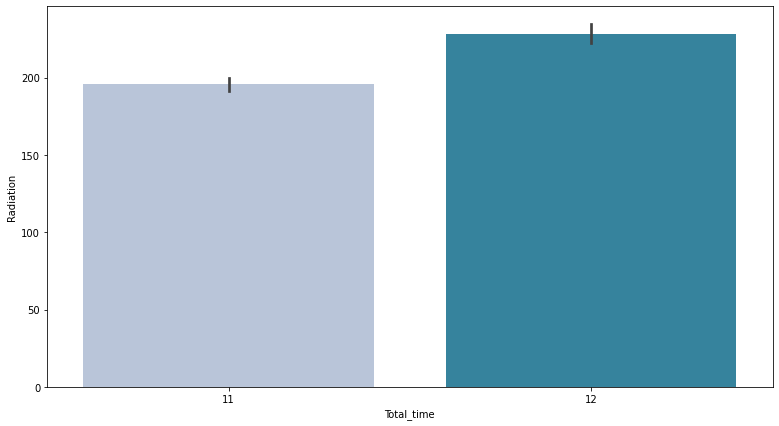

In [19]:
fig  , ax   = plt.subplots(figsize=(13 , 7))
sns.barplot(x="Total_time" , y="Radiation" , data=df ,palette="PuBuGn")

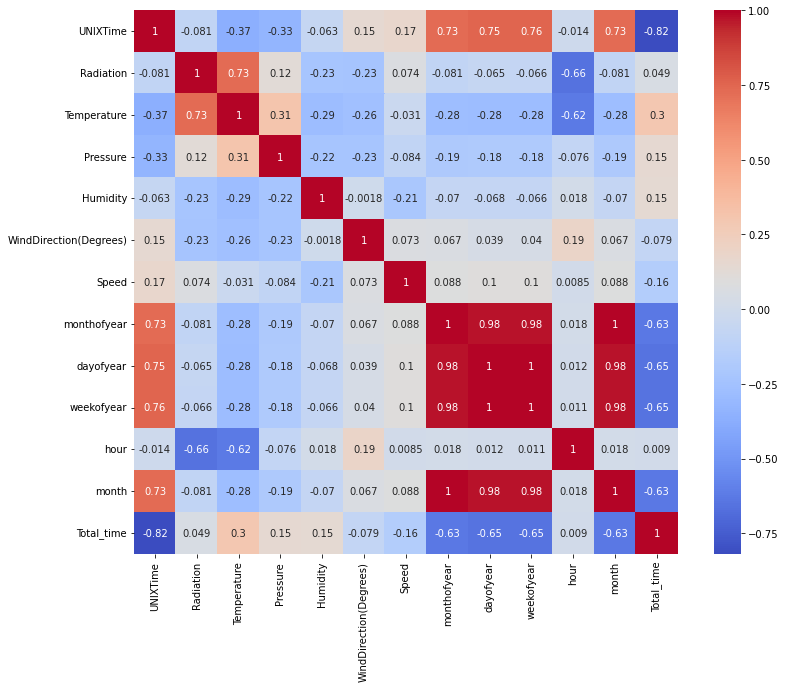

In [20]:
corr  = df.corr(method="pearson")
fig  , ax   = plt.subplots(figsize=(13 , 10))
sns.heatmap(corr  ,mask=np.zeros_like(corr , dtype=np.bool) , cmap="coolwarm" , square=True , ax=ax ,annot=True)

In [21]:
X = df[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
             'monthofyear', 'dayofyear', 'weekofyear', 'Total_time']]

y = df['Radiation']

In [22]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train  ,y_test = train_test_split(X , y , test_size  = 0.80 , random_state = 40)

In [23]:
from sklearn.ensemble import AdaBoostRegressor , GradientBoostingRegressor , RandomForestRegressor , ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor , LinearRegression , Ridge  , Lasso , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import median_absolute_error, mean_poisson_deviance, mean_gamma_deviance
from sklearn.model_selection import KFold

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
models = [("linear Regression" , LinearRegression()),
          ("decision tree" , DecisionTreeRegressor()),
          ("RandomForest" , RandomForestRegressor()),
          ("Extra tree" , ExtraTreesRegressor()),
          ("Gridient boosting" , GradientBoostingRegressor()),
          ("KNeigbers" , KNeighborsRegressor())]

In [40]:
all_data = []
scoring = {"r2":"r2",
           "root_mean_squared_error":"neg_root_mean_squared_error",
           "mean_squared_error":"neg_mean_absolute_error",
           "mean_squared_error":"neg_mean_squared_error",
           "max_error":"max_error"}
  
for name , model in models:
  results =cross_validate(model , x_train , y_train , cv = 10 , scoring=scoring)
  all_data.append({"model":name ,"score":results})
  print(f"\x1b[96m{name}\x1b[0m: \x1b[93m{results['test_r2'].mean():.6f}\x1b[0m ± {results['test_r2'].std():.4f}")

linear Regression: 0.592682 ± 0.0186
decision tree: 0.633125 ± 0.0376
RandomForest: 0.810614 ± 0.0152
Extra tree: 0.822567 ± 0.0125
Gridient boosting: 0.744540 ± 0.0131
KNeigbers: 0.624695 ± 0.0204


In [64]:
performance = {'model':[], 'rmse':[], 'mse':[], 'r2':[],'me':[]}

for d in all_data:   
    performance['model'].append(d['model'])
    performance['r2'].append(np.abs(d['score']['test_r2'].mean())*100)
    performance['mse'].append(np.abs(d['score']['test_mean_squared_error'].mean()))
    performance['rmse'].append(np.abs(d['score']['test_root_mean_squared_error'].mean()))
    #performance['mae'].append(np.abs(d['score']['mean_absolute_error'].mean()))
    performance['me'].append(np.abs(d['score']['test_max_error'].mean()))
    
print(performance)

{'model': ['linear Regression', 'decision tree', 'RandomForest', 'Extra tree', 'Gridient boosting', 'KNeigbers'], 'rmse': [197.71036306493346, 187.444736972101, 134.7782739972527, 130.48588422280486, 156.55401600245278, 189.751836138594], 'mse': [39119.523546573255, 35241.862995153, 18206.388562865126, 17062.035685279476, 24526.684077740407, 36038.486886559316], 'r2': [59.268223990152705, 63.31249589681074, 81.06138936107602, 82.25671176139582, 74.4539527421307, 62.46951691278573], 'me': [771.9428551492861, 1016.818, 743.6466800000002, 748.1096, 779.5651901785548, 920.2622000000001]}


In [65]:
import plotly.express as px

In [71]:
df_new = pd.DataFrame(performance , index=performance['model'], columns=['rmse', 'r2', 'mse'])

In [72]:
df_new

,rmse,r2,mse
linear Regression,197.710363,59.268224,39119.523547
decision tree,187.444737,63.312496,35241.862995
RandomForest,134.778274,81.061389,18206.388563
Extra tree,130.485884,82.256712,17062.035685
Gridient boosting,156.554016,74.453953,24526.684078
KNeigbers,189.751836,62.469517,36038.486887


In [79]:
def model_plot (plot1):
  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(x="model", y=plot1, data=performance, color="lightblue");

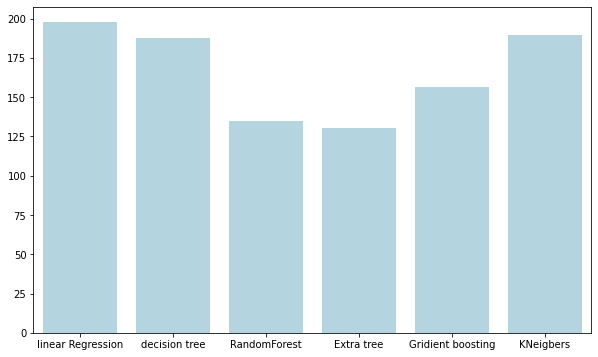

In [80]:
model_plot("rmse")

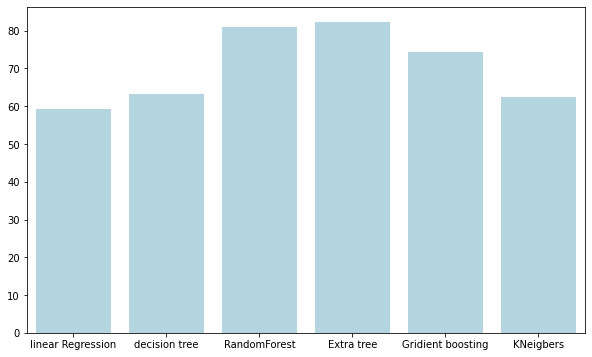

In [81]:
model_plot("r2")

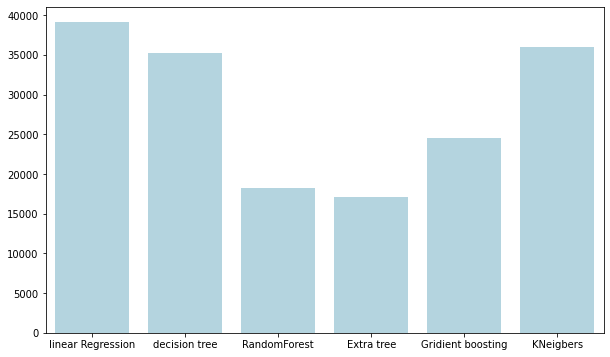

In [82]:
model_plot("mse")